In [1]:
setwd("../Data")
## Lecture des données de Kc au pas de temps mensuel
kc.moi <- read.csv('../Data/Tableau_Kc_Ebener1999.csv',header=TRUE)

In [2]:
kc.moi

mois,Prairies,Vigne,Foret.de.conifères,Mais
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.45,0.25,1.00,0.20
2,0.45,0.25,1.00,0.20
3,0.50,0.25,1.02,0.20
4,0.61,0.38,1.05,0.32
5,0.78,0.53,1.07,0.68
6,0.78,0.70,1.10,1.20
7,0.78,0.73,1.10,1.20
8,0.78,0.73,1.10,0.91
9,0.65,0.65,1.06,0.65


In [2]:
## Date pour les valeurs de Kc mensuel
kc.dates <- as.Date(c("2016-1-1",paste("2016",kc.moi$mois,"15",sep="-"),"2016-12-31"))
## Passage au jour julien
kc.doi <- julian(kc.dates,origin = as.Date("2016-01-01"))+1

In [3]:
kc.dates

[1] "2016-01-01" "2016-01-15" "2016-02-15" "2016-03-15" "2016-04-15"
 [6] "2016-05-15" "2016-06-15" "2016-07-15" "2016-08-15" "2016-09-15"
[11] "2016-10-15" "2016-11-15" "2016-12-15" "2016-12-31"

In [5]:
kc.doi
length(kc.doi)
dim(kc.moi)

[1]   1  15  46  75 106 136 167 197 228 259 289 320 350 366
attr(,"origin")
[1] "2016-01-01"

[1] 14

[1] 12  5

In [4]:
## Kc de la culture d'intérêt.

kc.prairies <- c(kc.moi$Prairies[1],kc.moi$Prairies,kc.moi$Prairies[12])
kc.vigne <- c(kc.moi$Vigne[1],kc.moi$Vigne,kc.moi$Vigne[12])
kc.conifere <- c(kc.moi$Foret.de.conifères[1],kc.moi$Foret.de.conifères,kc.moi$Foret.de.conifères[12])
kc.mais <- c(kc.moi$Mais[1],kc.moi$Mais,kc.moi$Mais[12])

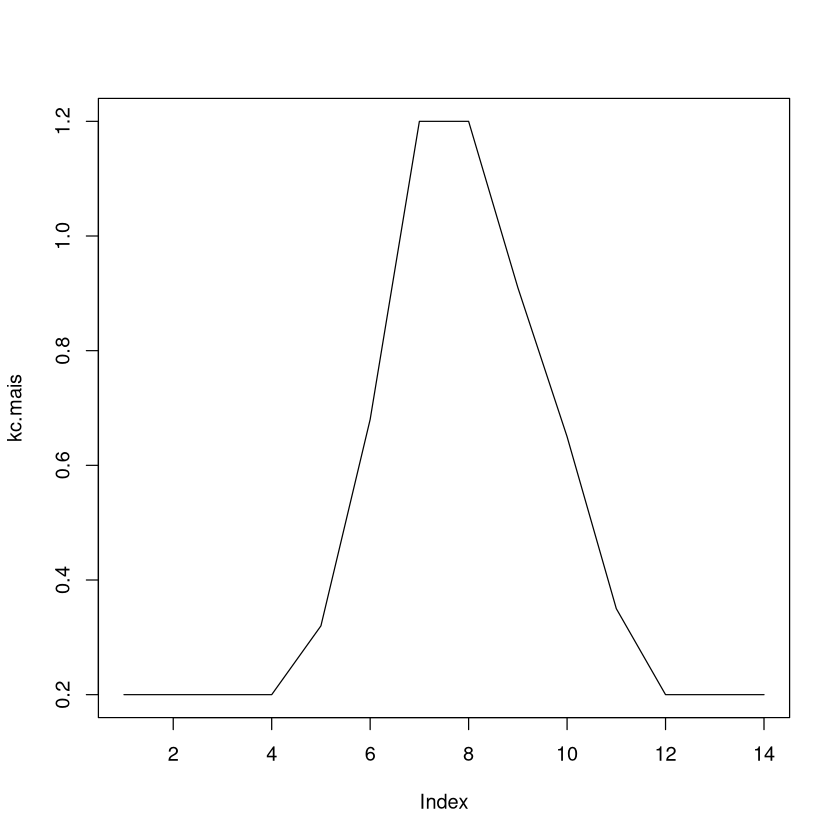

In [5]:
plot(kc.mais, type="l") ## Trace le Kc pour le maïs

In [6]:
## transforme les dates calendaires en jours juliens ou day of the year pour une année type
## au pas de temps journalier
mydates <- seq(as.Date("2016/1/1"), as.Date("2016/12/31"), by = "days")
doi <- julian(mydates,origin = as.Date("2016-01-01"))+1

In [9]:
doi

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
[253] 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
[271] 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
[289] 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
[307] 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
[325] 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
[343] 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
[361] 361 362 363 364 365 366
attr(,"origin")
[1] "2016-01-01"

In [10]:
str(doi)

 num [1:366] 1 2 3 4 5 6 7 8 9 10 ...
 - attr(*, "origin")= Date[1:1], format: "2016-01-01"


In [7]:
## fonction pour l'interpolation de kc au pas de temps journalier
## selon 3 méthodes : contant, linéaire, spline
kcinterp <- function(kc.doi=kc.doi,kc.os=NULL,doi=doi){
    kc.capprox <- approx(x=kc.doi,y=kc.os,xout=doi,method='constant')$y
    kc.lapprox <- approx(x=kc.doi,y=kc.os,xout=doi,method='linear')$y
    kc.spline <- spline(x=kc.doi,y=kc.os,xout=doi)$y
    return(cbind(doi,kc.capprox,kc.lapprox,kc.spline))
}

## Interpolation de Kc journalière
mykc <- kcinterp(kc.doi=kc.doi,kc.os=kc.mais,doi=doi)
head(mykc)

doi,kc.capprox,kc.lapprox,kc.spline
1,0.2,0.2,0.2000000
2,0.2,0.2,0.1999332
3,0.2,0.2,0.1998767
4,0.2,0.2,0.1998305
5,0.2,0.2,0.1997945
6,0.2,0.2,0.1997688


In [9]:
class(mykc)

[1] "matrix" "array"

In [11]:
## création d'un dataframe avec jour julien et valeur de kc interpolée
Kc <- as.data.frame(mykc)
colnames(Kc) <- c("doi","kcc","kcl","kcs")
##remplace les NA
#ind <- which(is.na(Kc),arr.ind=TRUE)
#for(i in 1:nrow(ind)){Kc[ind[i,1],ind[i,2]] <- Kc[ind[i,1]-1,ind[i,2]]}
#head(Kc)

In [15]:
dim(Kc)

[1] 366   4

In [16]:
tail(Kc)

,doi,kcc,kcl,kcs
,<dbl>,<dbl>,<dbl>,<dbl>
361,361,0.2,0.2,0.2025223
362,362,0.2,0.2,0.2022507
363,363,0.2,0.2,0.2018689
364,364,0.2,0.2,0.2013706
365,365,0.2,0.2,0.2007497
366,366,0.2,0.2,0.2000000


In [12]:
## sauvegarde du Kc au pas de journalier
## dans le cas présente c'est le Kc du Maïs
getwd()
setwd("../Data/")
save(Kc, file="Kc.RData")

[1] "/home/thierry/works/wdM2/UE4/UE4_Climat_2024/Data"

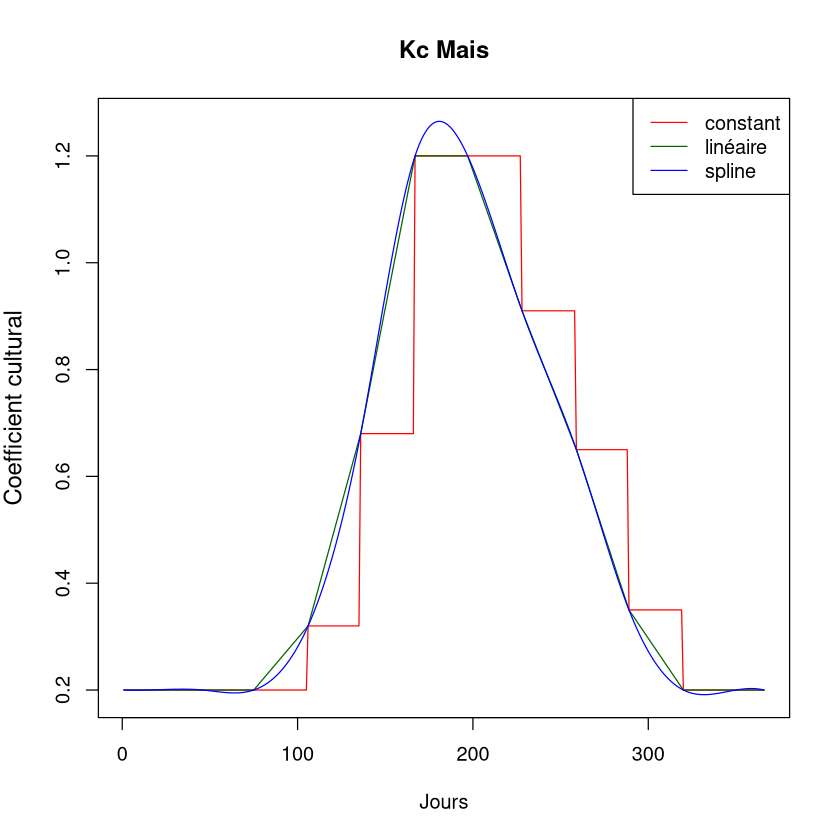

In [13]:
## trace evolution annuelle de Kc
#pdf("figKc.pdf", width = 6, height = 6)
plot(kcc~doi,data=Kc,type="l",col="red", xlab = "Jours", main="Kc Mais",
     ylab=list("Coefficient cultural",cex=1.2), ylim = c(min(Kc$kcs),max(Kc$kcs)))
lines(kcl~doi,data=Kc,type="l",col="darkgreen")
lines(kcs~doi,data=Kc,type="l",col="blue")
legend("topright", c("constant", "linéaire","spline"),col=c("red","darkgreen","blue"),lwd = 1)
#dev.off()

In [26]:
head(Kc)

,doi,kcc,kcl,kcs
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.2,0.2,0.2000000
2,2,0.2,0.2,0.1999332
3,3,0.2,0.2,0.1998767
4,4,0.2,0.2,0.1998305
5,5,0.2,0.2,0.1997945
6,6,0.2,0.2,0.1997688


In [27]:
dim(Kc)

[1] 366   4

In [ ]:
save(Kc,file="RData")